### Bloco 2 | Projeto de Experiência
### Primeira Entrega (N1) - FASE 1

####  - Nome: Kauê Cabrera Rosalem
####  - Disciplina: Projeto de Experiência
####  - Projeto: FASE 1 - Desvendando crimes na cidade de Boston

### Importação das Bibliotecas Principais

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pylab as pl
import numpy as np

### Importação da Base de Dados

Lendo o arquivo csv com registros separados por ";" e criando uma base de dados:

In [2]:
data_base = pd.read_csv('crimes1.csv', ";")
data_base.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


### Pré-processamento dos dados

Gerando uma base de dados com os registros de interesse na fase 1 do projeto:

In [3]:
filtro_b2 = data_base['DISTRICT'] == 'B2' # filtrando distrito B2
data_base_b2 = data_base[filtro_b2]
data_base_b2.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,2018-09-03 21:25:00,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
7,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,NaN,2018-09-03 20:39:37,2018,9,Monday,20,Part Three,LAWN ST,42.327016,-71.105551,"(42.32701648, -71.10555088)"
18,I182070917,2647,Other,THREATS TO DO BODILY HARM,B2,901,NaN,2018-09-03 19:52:00,2018,9,Monday,19,Part Two,HORADAN WAY,42.333717,-71.096658,"(42.33371742, -71.09665806)"
19,I182070915,614,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,B2,181,NaN,2018-09-02 18:00:00,2018,9,Sunday,18,Part One,SHIRLEY ST,42.325695,-71.068168,"(42.32569490, -71.06816778)"
24,I182070908,522,Residential Burglary,BURGLARY - RESIDENTIAL - NO FORCE,B2,911,NaN,2018-09-03 18:38:00,2018,9,Monday,18,Part One,ANNUNCIATION RD,42.335062,-71.093168,"(42.33506218, -71.09316781)"


Verificando quantidade total de registros e atributos:

In [4]:
data_base_b2.shape

(9823, 17)

Verificando a quantidade de valores nulos por atributo:

In [5]:
data_base_b2.isnull().sum()

INCIDENT_NUMBER           0
OFFENSE_CODE              0
OFFENSE_CODE_GROUP        0
OFFENSE_DESCRIPTION       0
DISTRICT                  0
REPORTING_AREA            0
SHOOTING               9757
OCCURRED_ON_DATE          0
YEAR                      0
MONTH                     0
DAY_OF_WEEK               0
HOUR                      0
UCR_PART                  5
STREET                  126
Lat                     727
Long                    727
Location                  0
dtype: int64

Note que os registros nulos não precisam ser eliminados nesta fase, pois não afetará a análise dos atributos mês (MONTH), dia da semana (DAY_OF_WEEK) e horário (HOUR) em que ocorreram os crimes.

### Manipulação da Base

Criando uma base de dados com apenas os atributos a serem analisados na fase 1:

In [6]:
fase1 = data_base_b2.drop(columns=["INCIDENT_NUMBER", "OFFENSE_CODE", "OFFENSE_DESCRIPTION", "SHOOTING", 
                                   "OCCURRED_ON_DATE", "YEAR", "UCR_PART", "STREET", "Long", "Lat", "Location"])                                 
    
fase1.head()

,OFFENSE_CODE_GROUP,DISTRICT,REPORTING_AREA,MONTH,DAY_OF_WEEK,HOUR
6,Auto Theft,B2,330,9,Monday,21
7,Verbal Disputes,B2,584,9,Monday,20
18,Other,B2,901,9,Monday,19
19,Larceny From Motor Vehicle,B2,181,9,Sunday,18
24,Residential Burglary,B2,911,9,Monday,18


Verificando o número de crimes por mês em 2018:

In [7]:
fase1["MONTH"].value_counts()

6     1358
5     1300
7     1290
4     1225
8     1219
3     1187
1     1094
2     1020
9      102
12      17
10       6
11       5
Name: MONTH, dtype: int64

Verificando o número de crimes por dia da semana:

In [8]:
fase1["DAY_OF_WEEK"].value_counts()

Friday       1517
Wednesday    1511
Thursday     1431
Tuesday      1421
Monday       1386
Saturday     1359
Sunday       1198
Name: DAY_OF_WEEK, dtype: int64

### Técnicas estatísticas

Verificando a porcentagem de crimes por mês em 2018:

In [9]:
fase1["MONTH"].value_counts(normalize=True)

6     0.138247
5     0.132342
7     0.131324
4     0.124707
8     0.124097
3     0.120839
1     0.111371
2     0.103838
9     0.010384
12    0.001731
10    0.000611
11    0.000509
Name: MONTH, dtype: float64

Verificando a porcentagem de crimes por dias da semana em 2018:

In [10]:
fase1["DAY_OF_WEEK"].value_counts(normalize=True)

Friday       0.154433
Wednesday    0.153823
Thursday     0.145679
Tuesday      0.144660
Monday       0.141097
Saturday     0.138349
Sunday       0.121959
Name: DAY_OF_WEEK, dtype: float64

Verificando a porcentagem de crimes por mês do Distrito B2 em comparação aos demais destritos:

In [11]:
est_mes = (fase1["MONTH"].value_counts() / data_base["MONTH"].value_counts()) * 100
est_mes

1     15.249512
2     14.710124
3     15.349800
4     15.467172
5     14.577259
6     15.341166
7     15.085955
8     14.584829
9     14.206128
10     8.000000
11     6.666667
12     7.522124
Name: MONTH, dtype: float64

Verificando a porcentagem de crimes por dia da semana do Distrito B2 em comparação aos demais destritos:

In [12]:
est_semana = (fase1["DAY_OF_WEEK"].value_counts() / data_base["DAY_OF_WEEK"].value_counts()) * 100
est_semana 

Friday       15.114078
Monday       14.821944
Saturday     14.645975
Sunday       14.563579
Thursday     14.696518
Tuesday      15.117021
Wednesday    15.898569
Name: DAY_OF_WEEK, dtype: float64

Verificando a porcentagem de crimes por hora do dia do Distrito B2 em comparação aos demais destritos:

In [13]:
est_horas = (fase1["HOUR"].value_counts() / data_base["HOUR"].value_counts()) * 100
est_horas

0     13.871571
1     15.980231
2     15.803109
3     16.572077
4     15.767045
5     15.588235
6     16.226415
7     14.975583
8     13.441654
9     13.742211
10    13.389242
11    15.717927
12    14.849962
13    13.974895
14    15.570839
15    15.435238
16    14.869323
17    14.652829
18    15.010930
19    14.759725
20    14.993954
21    16.541096
22    15.927497
23    16.828479
Name: HOUR, dtype: float64

### Resultados estatísticos/analíticos

Histograma do número de crimes por mês em 2018 para o distrito B2:

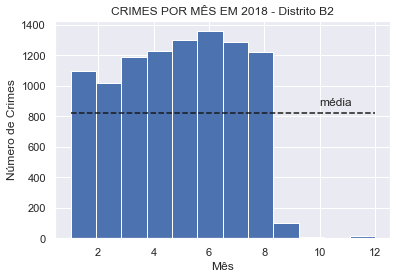

In [27]:
sns.set()
plt.hist(fase1['MONTH'], bins=12) # crimes por mês
plt.title('CRIMES POR MÊS EM 2018 - Distrito B2')
plt.xlabel('Mês')
plt.ylabel('Número de Crimes')

media_mes = fase1["MONTH"].value_counts().mean()
plt.hlines(media_mes, 1,12, linestyles='dashed')
plt.annotate('média',(10, media_mes+50))
plt.savefig('fase1_1.png', format='png')
plt.show()

Histograma do número de crimes por mês em 2018 para todos os distritos:

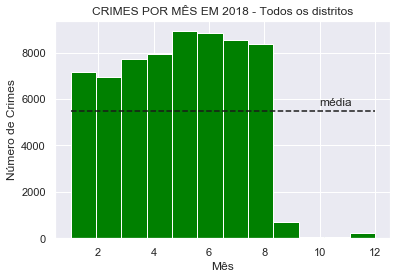

In [28]:
sns.set()
plt.hist(data_base['MONTH'], bins=12, color="green") # crimes por mês
plt.title('CRIMES POR MÊS EM 2018 - Todos os distritos')
plt.xlabel('Mês')
plt.ylabel('Número de Crimes')

media_mes_t = data_base["MONTH"].value_counts().mean()
plt.hlines(media_mes_t, 1,12, linestyles='dashed')
plt.annotate('média',(10, media_mes_t+250))
plt.savefig('fase1_2.png', format='png')
plt.show()

Gráfico da porcentagem de crimes por mês em 2018 para o distrito B2:

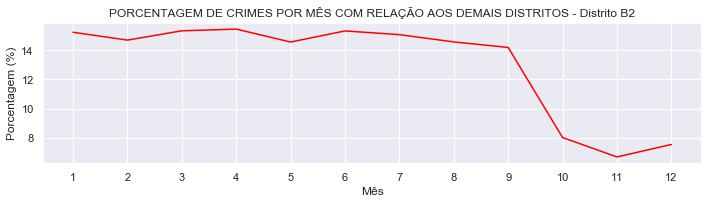

In [29]:
plt.figure(figsize = (10, 3))
est_mes.plot(color="red")
plt.xticks(rotation=0)
plt.xticks(range(1, 13))
plt.yticks()
plt.axis()
plt.ylabel('Porcentagem (%)')
plt.xlabel('Mês')
plt.title('PORCENTAGEM DE CRIMES POR MÊS COM RELAÇÃO AOS DEMAIS DISTRITOS - Distrito B2')
plt.savefig('fase1_3.png', format='png')
plt.tight_layout()

Histograma do número de crimes por dias da semana para o distrito B2:

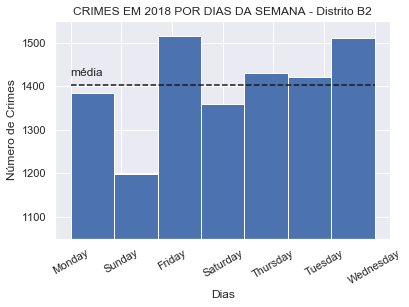

In [30]:
plt.hist(fase1['DAY_OF_WEEK'], bins=7) # crimes por dias da semana
plt.title('CRIMES EM 2018 POR DIAS DA SEMANA - Distrito B2')
plt.xlabel('Dias')
plt.xticks(rotation=30)
plt.ylabel('Número de Crimes')
plt.ylim(1050, 1550) 

media_semana = fase1["DAY_OF_WEEK"].value_counts().mean()
plt.hlines(media_semana, 0,6, linestyles='dashed')
plt.annotate('média',(0, media_semana+20))
plt.savefig('fase1_4.png', format='png')
plt.show()

Histograma do número de crimes por mês em 2018 para todos os distritos:

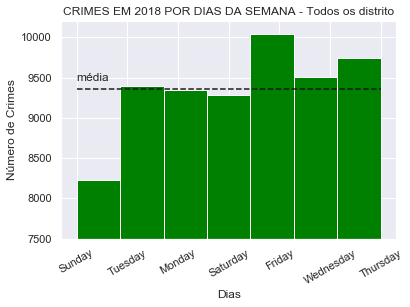

In [31]:
plt.hist(data_base['DAY_OF_WEEK'], bins=7, color="green") # crimes por dias da semana
plt.title('CRIMES EM 2018 POR DIAS DA SEMANA - Todos os distrito')
plt.xlabel('Dias')
plt.xticks(rotation=30)
plt.ylabel('Número de Crimes')
plt.ylim(7500, 10200)

media_semana_t = data_base["DAY_OF_WEEK"].value_counts().mean()
plt.hlines(media_semana_t, 0,6, linestyles='dashed')
plt.annotate('média',(0, media_semana_t+100))
plt.savefig('fase1_5.png', format='png')
plt.show()

Gráfico de pizza para a porcentagem de crimes por dias da semana ao considerar todos os distritos:

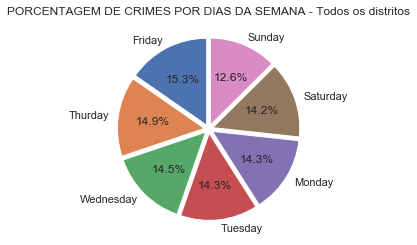

In [32]:
legenda_semana = 'Friday', 'Thurday', 'Wednesday', 'Tuesday', 'Monday', 'Saturday', 'Sunday'
fatias = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
valores_semana = data_base["DAY_OF_WEEK"].value_counts()
plt.pie(valores_semana , explode = fatias, labels = legenda_semana, autopct='%1.1f%%', startangle=90)
plt.title('PORCENTAGEM DE CRIMES POR DIAS DA SEMANA - Todos os distritos')
plt.savefig('fase1_6.png', format='png')
plt.show()

Gráfico da porcentagem de crimes por dia da semana para o distrito B2:

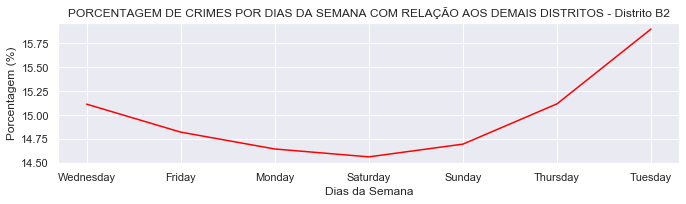

In [33]:
plt.figure(figsize = (10, 3))
est_semana.plot(color="red")
plt.xticks(rotation=0)
plt.xticks(range(0, 7))
plt.yticks()
plt.axis()
plt.ylabel('Porcentagem (%)')
plt.xlabel('Dias da Semana')
plt.title('PORCENTAGEM DE CRIMES POR DIAS DA SEMANA COM RELAÇÃO AOS DEMAIS DISTRITOS - Distrito B2')
plt.savefig('fase1_7.png', format='png')
plt.tight_layout()

Histograma do número de crimes por horas do dia para o distrito B2:

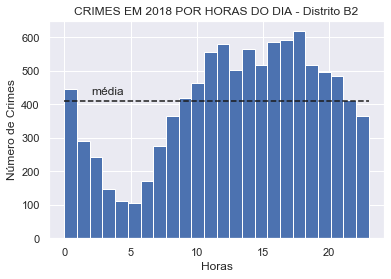

In [34]:
plt.hist(fase1['HOUR'], bins=24) # crimes por horas do dia
plt.title('CRIMES EM 2018 POR HORAS DO DIA - Distrito B2')
plt.xlabel('Horas')
plt.ylabel('Número de Crimes')

media_hora = fase1["HOUR"].value_counts().mean()
plt.hlines(media_hora, 0,23, linestyles='dashed')
plt.annotate('média',(2, media_hora+20))
plt.savefig('fase1_8.png', format='png')
plt.show()

Histograma do número de crimes por horas do dia para todos os distritos:

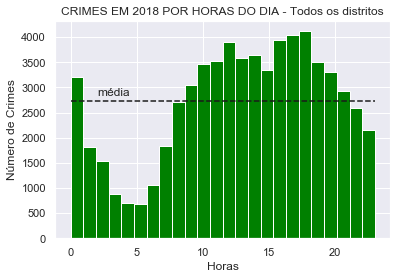

In [35]:
plt.hist(data_base['HOUR'], bins=24, color="green") # crimes por horas do dia
plt.title('CRIMES EM 2018 POR HORAS DO DIA - Todos os distritos')
plt.xlabel('Horas')
plt.ylabel('Número de Crimes')

media_hora_t = data_base["HOUR"].value_counts().mean()
plt.hlines(media_hora_t, 0,23, linestyles='dashed')
plt.annotate('média',(2, media_hora_t+100))
plt.savefig('fase1_9.png', format='png')
plt.show()

Gráfico de porcentagem de crimes por horas do dia ao comparar o distrito B2 com os demais distritos:

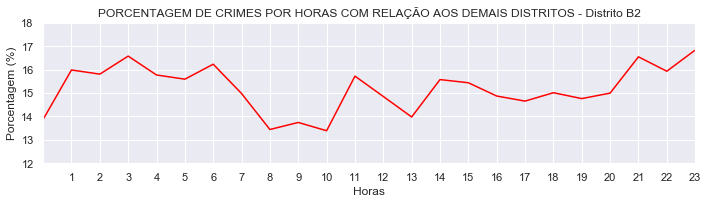

In [36]:
plt.figure(figsize = (10, 3))
est_horas.plot(color="red")
plt.xticks(rotation=0)
plt.xticks(range(1, 24))
plt.yticks()
plt.axis([0, 23, 12, 18])
plt.xlabel('Horas')
plt.ylabel('Porcentagem (%)')
plt.title('PORCENTAGEM DE CRIMES POR HORAS COM RELAÇÃO AOS DEMAIS DISTRITOS - Distrito B2')
plt.savefig('fase1_10.png', format='png')
plt.tight_layout()

Verificando o número de crimes por tipo:

In [24]:
fase1["OFFENSE_CODE_GROUP"].value_counts().head(16)

Motor Vehicle Accident Response    1244
Medical Assistance                  743
Verbal Disputes                     654
Other                               631
Investigate Person                  528
Simple Assault                      525
Drug Violation                      501
Larceny                             488
Vandalism                           433
Investigate Property                333
Aggravated Assault                  317
Property Lost                       300
Larceny From Motor Vehicle          277
Violations                          266
Towed                               251
Warrant Arrests                     202
Name: OFFENSE_CODE_GROUP, dtype: int64

Gráfico de barras horizontais indicando o número de crimes em cada categoria (tipo):

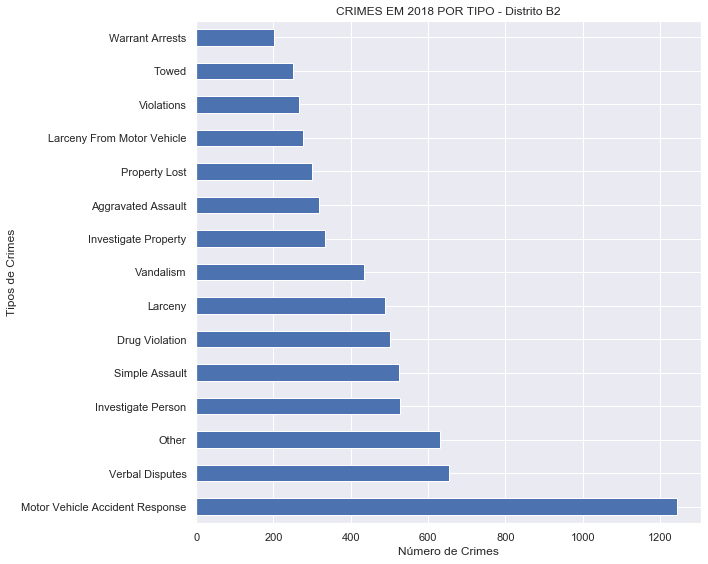

In [37]:
fase1_tipofiltro = (fase1['OFFENSE_CODE_GROUP'] == 
                    "Motor Vehicle Accident Response") | (fase1['OFFENSE_CODE_GROUP'] == "Verbal Disputes") | (fase1['OFFENSE_CODE_GROUP'] == "Other") | (fase1['OFFENSE_CODE_GROUP'] == "Investigate Person") | (fase1['OFFENSE_CODE_GROUP'] == "Simple Assault") | (fase1['OFFENSE_CODE_GROUP'] == "Drug Violation") | (fase1['OFFENSE_CODE_GROUP'] == "Larceny") | (fase1['OFFENSE_CODE_GROUP'] == "Vandalism") | (fase1['OFFENSE_CODE_GROUP'] == "Investigate Property") | (fase1['OFFENSE_CODE_GROUP'] == "Aggravated Assault") | (fase1['OFFENSE_CODE_GROUP'] == "Property Lost") | (fase1['OFFENSE_CODE_GROUP'] == "Larceny From Motor Vehicle") | (fase1['OFFENSE_CODE_GROUP'] == "Violations") | (fase1['OFFENSE_CODE_GROUP'] == "Towed") | (fase1['OFFENSE_CODE_GROUP'] == "Warrant Arrests")
# plot do número de crimes pelos principais tipos/grupos
fase1_tipo = fase1[fase1_tipofiltro]
fase1_tipo['OFFENSE_CODE_GROUP'].value_counts().plot.barh(figsize=(10,8))
plt.xticks()
plt.yticks()
plt.xlabel('Número de Crimes')
plt.ylabel('Tipos de Crimes')
plt.title('CRIMES EM 2018 POR TIPO - Distrito B2')
plt.savefig('fase1_11.png', format='png')
plt.tight_layout()

### Análises e Conclusões

Na fase 1 do projeto "Desvendando crimes na cidade de Boston" verificou-se o número de crimes e suas porcentagens pelos meses do ano de 2018, pelos dias da semana, pelas horas do dia e pelo tipo de crime. Os números de crimes foram apresentados através de gráficos do tipo histograma para os diferentes intervalos de tempo (meses, dias da semana e horas do dia) ao considerar todos os distritos e, especificamente, o distrito B2. Para uma referência estatística adequada, apresentou-se os valores médios em todos os histogramas. Comparou-se os resultados referentes ao Distrito B2 aos demais distritos policiais através da porcentagem relativa mostradas nos gráficos de linha. Através dos resultados, verificou-se que no ano de 2018 o mês de junho se apresenta com o maior índice de crimes no distrito B2. Ao considerar todas as semanas do ano de 2018, sexta-feira é o dia da semana com o maior índice de crimes no distrito B2. Ao considerar todos os dias do ano de 2018, o maior índice de crimes ocorre às 19 horas no distrito B2. De forma geral, o Distrito B2 representa, aproximadamente, 15% do total de crimes de nossa base de dados. Por fim, observou-se que os três principais acidentes no Distrito B2 estão classificados da seguinte forma: resposta a acidentes de automóvel; assistência médica; disputas verbais.